# 1. Regresión Lineal Bayesiana
Es un modelo que amplía la regresión lineal tradicional al incorporar incertidumbre en los parámetros del modelo.

## Modelo Matemático:
La salida \( y \) se calcula como una combinación lineal de funciones base \( \varphi_i(x) \) ponderadas por los pesos \( w_i \):
\[
y = w^T \varphi
\]
Donde \( \varphi \) es un vector de funciones base evaluadas en \( x \), y \( w \) es el vector de pesos.

### Evaluación en múltiples puntos:
Si evaluamos el modelo en \( N \) puntos \( x_1, \dots, x_N \), la salida se escribe como:
\[
y = \Phi w
\]
Donde \( \Phi \) es una matriz que contiene las funciones base evaluadas en los puntos de entrada.

### Distribución a priori:
Si asumimos \( w \sim N(0, \alpha^{-1}) \) (los pesos tienen una distribución normal con media 0 y varianza \( \alpha^{-1} \)), entonces \( y \) también sigue una distribución normal:
\[
p(y|x) \sim N(0, K), \quad K = \alpha^{-1} \Phi \Phi^T
\]

# 2. Procesos Gaussianos (GP)
Son una extensión de la regresión lineal bayesiana, donde el número de funciones base es infinito, permitiendo modelar funciones no lineales de manera flexible.

## Definición:
Un proceso gaussiano es una distribución sobre funciones, definida por:
\[
f(x) \sim GP(m(x), k(x, x'))
\]
Donde:
- \( m(x) \): Función media, generalmente asumida como 0.
- \( k(x, x') \): Función de covarianza (kernel), que define cómo están relacionadas las evaluaciones \( f(x) \) y \( f(x') \).

# 3. Inferencia con Procesos Gaussianos

### 3.1. Sin ruido:
Dado un conjunto de datos de entrada \( D = \{x, y\} \) y nuevos puntos \( x^* \):

Las salidas \( \{y, y^*\} \) siguen una distribución conjunta gaussiana:
\[
p(y, y^* | x, x^*) \sim N \left( \begin{bmatrix} 0 \\ 0 \end{bmatrix}, \begin{bmatrix} K(x, x) & K(x, x^*) \\ K(x^*, x) & K(x^*, x^*) \end{bmatrix} \right)
\]
La distribución predictiva para \( y^* \) se deriva aplicando propiedades de condicionamiento en distribuciones gaussianas:
\[
p(y^* | x^*, D) \sim N(\mu, \Sigma)
\]
Donde:
- **Media predictiva**:
\[
\mu = K(x^*, x) K(x, x)^{-1} y
\]
- **Covarianza predictiva**:
\[
\Sigma = K(x^*, x^*) - K(x^*, x) K(x, x)^{-1} K(x, x^*)
\]

### 3.2. Con ruido:
Si las observaciones tienen ruido gaussiano \( \epsilon \sim N(0, \sigma^2) \):
\[
y = f(x) + \epsilon
\]
La matriz de covarianza se ajusta a:
\[
K(x, x) + \sigma^2 I
\]
Esto modifica las fórmulas predictivas, reemplazando \( K(x, x) \) por \( K(x, x) + \sigma^2 I \).

# 4. Funciones de Covarianza (Kernels)

## 4.1. Concepto:
Un kernel \( k(x, x') \) mide la similitud entre dos puntos \( x \) y \( x' \). La matriz de covarianza generada por el kernel debe ser semidefinida positiva \( C \geq 0 \).

## 4.2. Ejemplos:
### Estacionarios (dependen de \( d = x - x' \)):
- **Exponencial cuadrática (RBF)**:
\[
k(d) = \exp \left( - \frac{\|d\|^2}{l} \right)
\]
- **Matérn**: Suavidad controlada por \( \nu \):
\[
k(d) = \frac{\|d\|^\nu}{\Gamma(\nu)} K_\nu \left( \frac{\|d\|}{l} \right)
\]
- **Periódico**:
\[
k(x, x') = \exp \left( - \lambda \sin^2(\omega(x - x')) \right)
\]

### No estacionarios:
- **Lineal**:
\[
k(x, x') = x^T x'
\]
- **Red neuronal**:
\[
k(x, x') = \sin^{-1} \left( \frac{2x^T \Sigma x'}{(1 + 2x^T \Sigma x)(1 + 2x'^T \Sigma x')} \right)
\]

## 4.3. Combinaciones:
Kernels pueden combinarse mediante sumas, productos o escalas.

# 5. Selección de Modelos
El ajuste del kernel y sus hiperparámetros es crucial.

## Hiperparámetros:
Como \( l, \nu, \sigma^2 \).

## Selección Bayesiana:
Se calcula la probabilidad posterior de los parámetros:
\[
p(\theta | y, X) = \frac{p(y | X, \theta) p(\theta)}{p(y | X)}
\]
### Verosimilitud marginal:
Se maximiza:
\[
\log p(y | X, \theta) = -\frac{1}{2} y^T K^{-1} y - \frac{1}{2} \log |K| - \frac{n}{2} \log 2\pi
\]
Donde \( K \) incluye el efecto del ruido.

# 6. Observaciones Finales
- Los procesos gaussianos son flexibles y pueden modelar funciones complejas.
- La elección del kernel y el ajuste de hiperparámetros son esenciales.
- Aunque los cálculos pueden ser costosos, ofrecen soluciones analíticas en muchos casos.


# Procesos gaussianos con Scikit-Learn
Mientras que en los ejercicios anteriores hemos implementado directamente las fórmulas necesarias para realizar regresión con procesos gaussianos, actualizando la media y la función de covarianza, en este pretendemos aprovecharnos de una librería en que ya estén programadas.

Aunque existen otras librerías específicas para trabajar con procesos gaussianos que son más apropiadas (por ejemplo, tinygp o GPyTorch), aquí utilizaremos Scikit-Learn por ser ya conocida.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

### Muestreo.

In [2]:
# Construimos un vector con 200 elementos equiespaciados en (-2,3).
xs = np.linspace(-2,3,200)

Construimos el PG como un objeto de la clase `GaussianProcessRegressor`, utilizamos como *kernel* el exponencial cuadrático, con escala 0.5 como en el primer cuaderno, y tomamos 4 muestras (con `sample_y`) que dibujamos.

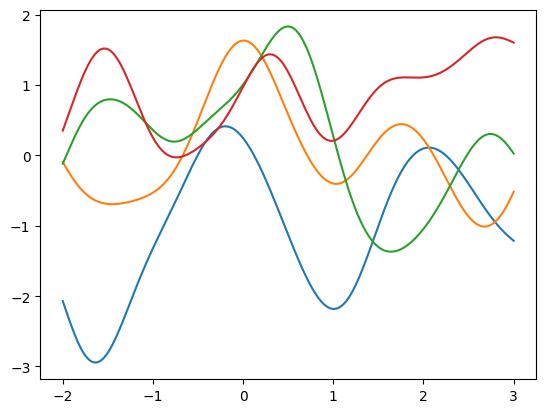

In [3]:
kernel = RBF(length_scale=0.5)
gp = GaussianProcessRegressor(kernel=kernel, optimizer=None)

# El primer argumento de sample_y tiene forma (N,D), donde D es el número
# de características; en este caso, solo es 1.

y_samples = gp.sample_y(xs.reshape(-1,1), n_samples=4)

plt.plot(xs, y_samples)
plt.show()

### Regresión.

Vamos a replicar la regresión del segundo cuaderno en la que buscábamos los parámetros óptimos.

In [4]:
# Definimos nuestras observaciones (las del cuaderno anterior).
x = np.array([-5, -3, 0, 0.1, 1, 4.9, 5])
y = np.array([0, -0.5, 1, 0.7, 0, 1, 0.7])

# Y la rejilla "de trabajo".
xs = np.linspace(-6, 6, 100)

Para ello, primero calculamos las verosimilitudes de nuestras observaciones para todos los puntos de una rejilla de tamaño 100x100 para los posibles valores de la escala y del ruido; suponemos que la primera toma valores entre 0.1 y 100, y el segundo entre 0.01 y 1. No hará falta implementar una función específica puesto que podemos utilizar el método `log_marginal_likelihood`.

In [24]:
# Construimos la rejilla, con nl y ns puntos respectivamente
nl = 100
ns = 100
l_grid = np.geomspace(10**-1, 10**2, nl)  # Longitudes de escala
sigma2_grid = np.geomspace(10**-2, 10**0, ns)  # Ruido

logprob = np.zeros((nl, ns))

for i, l in enumerate(l_grid):
    for j, s2 in enumerate(sigma2_grid):
        # Definir el kernel con los valores actuales de l y sigma^2
        kernel = RBF(length_scale=l) + s2 * RBF(length_scale=1e-5)  # Modelamos el ruido como un RBF muy pequeño

        # Crear el modelo de proceso gaussiano
        gp = GaussianProcessRegressor(kernel=kernel, optimizer=None)

        # Ajustar el modelo a los datos observados
        gp.fit(x.reshape(-1, 1), y)

        # Calcular el log-marginal likelihood
        logprob[i, j] = gp.log_marginal_likelihood()

Y las dibujamos.

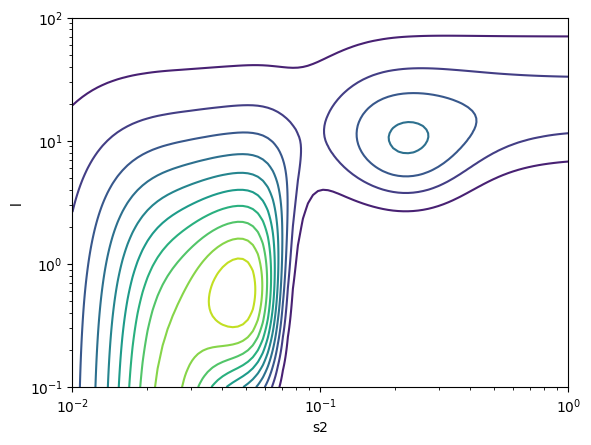

In [25]:
L, S = np.meshgrid(l_grid, sigma2_grid)
#levels = np.array([0.0001, 0.0005, 0.001, 0.002, 0.003])
plt.contour(S, L, np.exp(logprob), 10) # la primera coordenada de logprob
                                   # es L, que queremos esté en el eje Y
plt.xscale("log")
plt.yscale("log")
plt.xlabel("s2")
plt.ylabel("l")
plt.show()

Ahora realizamos la regresión. En la implementación de sklearn, para tener en cuenta el ruido hay que incluirlo en el *kernel* utilizando `WhiteKernel`.

El PG se ajusta con el método `fit`. Hay que tener en cuenta que esta función optimiza automáticamente los parámetros (la escala y el ruido); para desactivar esta característica habrá que pasar el argumento `optimizer=None` en la creación del PG.

Probemos primero desactivando la opción e inicializando la función de covarianza con un valor en la región del óptimo local en la esquina superior derecha de la gráfica anterior.

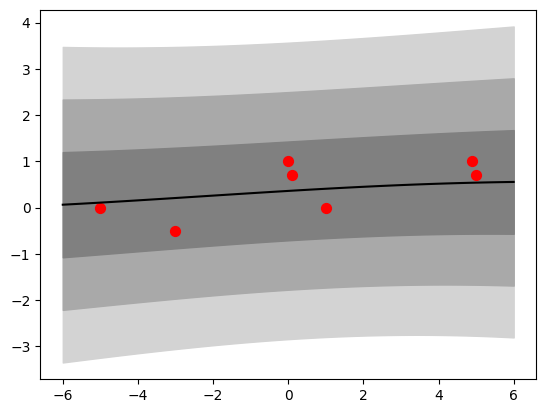

In [26]:
kernel = RBF(length_scale=10) + WhiteKernel(noise_level=1)

# El primer argumento de fit tiene forma (N,D), donde D es el número
# de características; en este caso, solo es 1.
gp = GaussianProcessRegressor(kernel=kernel, optimizer=None).fit(x.reshape(-1, 1), y)

# Predicción: media y desviación estándar
f_mean, f_std = gp.predict(xs.reshape(-1, 1), return_std=True)

plt.plot(xs, f_mean, 'k')
plt.fill_between(xs, f_mean - 3*f_std,f_mean + 3*f_std,color='lightgray')
plt.fill_between(xs, f_mean - 2*f_std,f_mean + 2*f_std,color='darkgray')
plt.fill_between(xs, f_mean - 1*f_std,f_mean + 1*f_std,color='gray')
plt.scatter(x, y, c='r', s=50)
plt.show()

Comparemos el resultado anterior con el que se obtiene dejando que `fit` optimice los parámetros.

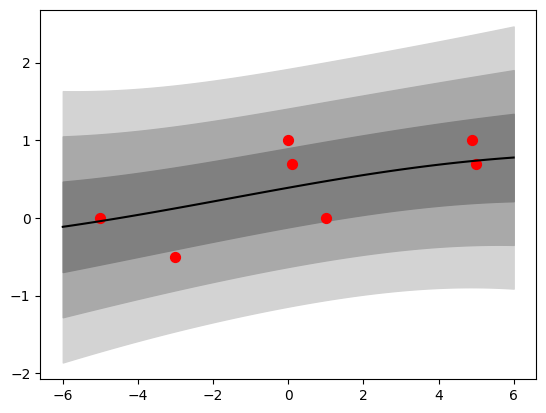

In [27]:
kernel = RBF(length_scale=10) + WhiteKernel(noise_level=1)

# El primer argumento de fit tiene forma (N,D), donde D es el número
# de características; en este caso, solo es 1.
gp = GaussianProcessRegressor(kernel=kernel).fit(x.reshape(-1, 1), y)

# Predicción: media y desviación estándar
f_mean, f_std = gp.predict(xs.reshape(-1, 1), return_std=True)

plt.plot(xs, f_mean, 'k')
plt.fill_between(xs, f_mean - 3*f_std,f_mean + 3*f_std,color='lightgray')
plt.fill_between(xs, f_mean - 2*f_std,f_mean + 2*f_std,color='darkgray')
plt.fill_between(xs, f_mean - 1*f_std,f_mean + 1*f_std,color='gray')
plt.scatter(x, y, c='r', s=50)
plt.show()

Por último, intentemos recuperar el óptimo global. La función `fit` utiliza como punto de partida en la optimización los valores iniciales de los parámetros, por lo que crearemos un *kernel* con valores similares a los usados en la llamada a `minimize` en el cuaderno anterior.

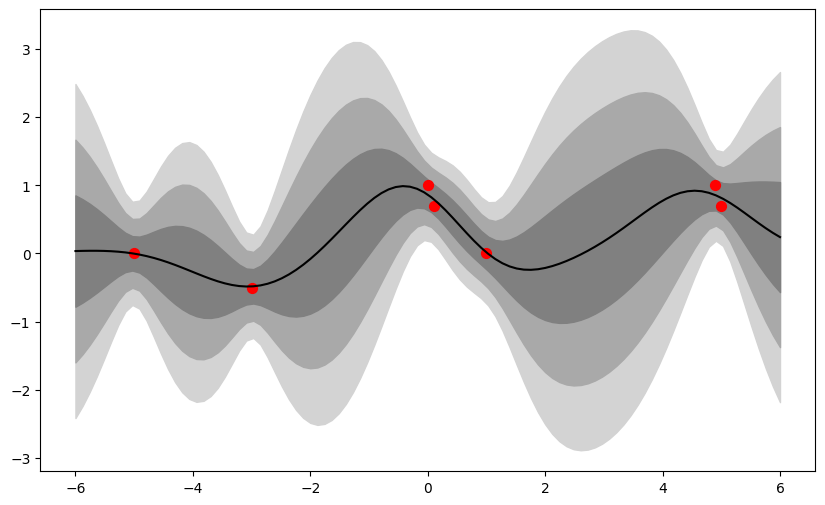

In [29]:
# Definición del kernel inicial con valores cercanos a los óptimos previos
kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-1, 1e2)) + WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-3, 1e1))

# Modelo de proceso gaussiano con optimización
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10).fit(x.reshape(-1, 1), y)

# Predicción: media y desviación estándar
f_mean, f_std = gp.predict(xs.reshape(-1, 1), return_std=True)


# Visualización
plt.figure(figsize=(10, 6))
plt.plot(xs, f_mean, 'k', label='Media predictiva')
plt.fill_between(xs, f_mean - 3*f_std, f_mean + 3*f_std, color='lightgray', label='Intervalo 3σ')
plt.fill_between(xs, f_mean - 2*f_std, f_mean + 2*f_std, color='darkgray', label='Intervalo 2σ')
plt.fill_between(xs, f_mean - 1*f_std, f_mean + 1*f_std, color='gray', label='Intervalo 1σ')
plt.scatter(x, y, c='r', s=50, label='Observaciones')
plt.show()